In [3]:
import pandas as pd
df = pd.read_excel('Data Analyst Test.xlsx')
df.head()

,Post ID,content type,Date posted,click,reach,impression
0,917697664961970_921719407893129,Photo,2015-08-11,11,17,1
1,917697664961970_922187454512991,Photo,2015-08-11,23,54,5
2,917697664961970_922176597847410,Photo,2015-08-11,9,16,9
3,917697664961970_921722437892826,Photo,2015-08-11,0,0,0
4,917697664961970_922199271178476,Link,2015-09-11,657,896,654


In [4]:
df.drop('Post ID', axis=1, inplace=True)
df.head()

,content type,Date posted,click,reach,impression
0,Photo,2015-08-11,11,17,1
1,Photo,2015-08-11,23,54,5
2,Photo,2015-08-11,9,16,9
3,Photo,2015-08-11,0,0,0
4,Link,2015-09-11,657,896,654


In [49]:
df_monthly=df
# x=df_monthly.groupby([pd.Grouper(key='Date posted',freq='M'), 'content type']).sum()
# print x

df_link=df[df['content type']=='Link'].groupby([pd.Grouper(key='Date posted',freq='M'), 'content type']).sum().reset_index()
df_photo=df[df['content type']=='Photo'].groupby([pd.Grouper(key='Date posted',freq='M'), 'content type']).sum().reset_index()
df_status=df[df['content type']=='Status'].groupby([pd.Grouper(key='Date posted',freq='M'), 'content type']).sum().reset_index()
df_sharedVideo=df[df['content type']=='SharedVideo'].groupby([pd.Grouper(key='Date posted',freq='M'), 'content type']).sum().reset_index()

In [52]:
print df_link.head()
print df_photo.head()
# print df_status.head()
print df_sharedVideo.head()



  Date posted content type  click  reach  impression
0  2015-01-31         Link    409    705         409
1  2015-02-28         Link   3913   6909         227
2  2015-03-31         Link    466    807         460
3  2015-06-30         Link  14122  16361         708
4  2015-07-31         Link   1438   2569         728
  Date posted content type  click  reach  impression
0  2015-01-31        Photo      3      5           0
1  2015-02-28        Photo    512    842         509
2  2015-03-31        Photo   1654   2199         785
3  2015-04-30        Photo   2090   2562         389
4  2015-05-31        Photo    507    919         347
  Date posted content type  click  reach  impression
0  2015-03-31       Status    163    289         163
1  2016-09-30       Status    206    355         206
  Date posted content type  click  reach  impression
0  2015-04-30  SharedVideo    196    368         196
1  2015-11-30  SharedVideo   1451   2563        1023
2  2016-03-31  SharedVideo   3362   5460      

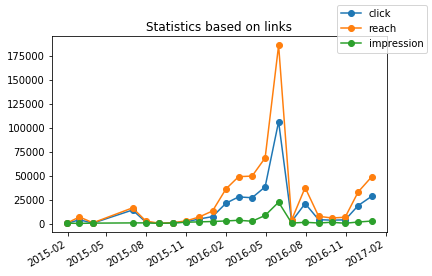

In [70]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot_date(df_link['Date posted'],df_link['click'], linestyle='-')
ax.plot_date(df_link['Date posted'],df_link['reach'], linestyle='-')
ax.plot_date(df_link['Date posted'],df_link['impression'], linestyle='-')
fig.legend(['click','reach','impression'])
fig.autofmt_xdate()
ax.set_title("Statistics based on links")
plt.show()

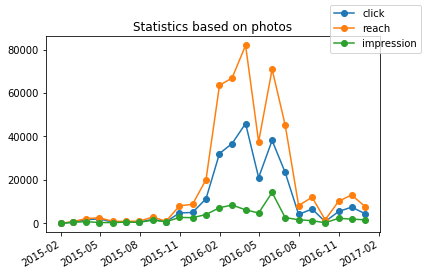

In [73]:
fig, ax = plt.subplots()
ax.plot_date(df_photo['Date posted'],df_photo['click'], linestyle='-')
ax.plot_date(df_photo['Date posted'],df_photo['reach'], linestyle='-')
ax.plot_date(df_photo['Date posted'],df_photo['impression'], linestyle='-')
fig.legend(['click','reach','impression'])
fig.autofmt_xdate()
ax.set_title("Statistics based on photos")
plt.show()

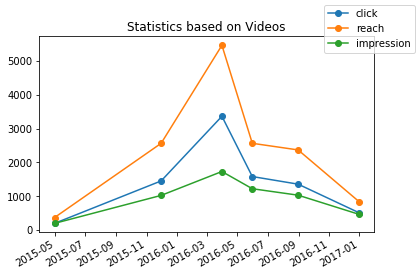

In [78]:
fig, ax = plt.subplots()
ax.plot_date(df_sharedVideo['Date posted'],df_sharedVideo['click'], linestyle='-')
ax.plot_date(df_sharedVideo['Date posted'],df_sharedVideo['reach'], linestyle='-')
ax.plot_date(df_sharedVideo['Date posted'],df_sharedVideo['impression'], linestyle='-')
fig.legend(['click','reach','impression'])
fig.autofmt_xdate()
ax.set_title("Statistics based on Videos")
plt.show()

In [79]:
print df_link.head()


  Date posted content type  click  reach  impression
0  2015-01-31         Link    409    705         409
1  2015-02-28         Link   3913   6909         227
2  2015-03-31         Link    466    807         460
3  2015-06-30         Link  14122  16361         708
4  2015-07-31         Link   1438   2569         728


In [87]:
df_link['diff_click']=df_link['click'].diff()
df_link['diff_reach']=df_link['reach'].diff()
df_link['diff_impression']=df_link['impression'].diff()

In [88]:
df_link

,Date posted,content type,click,reach,impression,diff_click,diff_reach,diff_impression
0,2015-01-31,Link,409,705,409,NaN,NaN,NaN
1,2015-02-28,Link,3913,6909,227,3504.0,6204.0,-182.0
2,2015-03-31,Link,466,807,460,-3447.0,-6102.0,233.0
3,2015-06-30,Link,14122,16361,708,13656.0,15554.0,248.0
4,2015-07-31,Link,1438,2569,728,-12684.0,-13792.0,20.0
5,2015-08-31,Link,235,328,227,-1203.0,-2241.0,-501.0
6,2015-09-30,Link,657,896,654,422.0,568.0,427.0
7,2015-10-31,Link,1785,2760,1388,1128.0,1864.0,734.0
8,2015-11-30,Link,4742,6808,1779,2957.0,4048.0,391.0
9,2015-12-31,Link,7255,13135,2162,2513.0,6327.0,383.0
